In [4]:
from tensorflow.keras.models import load_model
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_model.h5')

# Define class names in the same order as your training data
class_names = ['rd', 'glaucoma', 'normal']  # Change this if needed
img_size = (224, 224)  # Same size used during training



--- Predictions ---

dr_0.jpg | Predicted: dr | True: dr | ✅
dr_1.jpg | Predicted: dr | True: dr | ✅
dr_10.jpg | Predicted: dr | True: dr | ✅
dr_11.jpg | Predicted: dr | True: dr | ✅
dr_12.jpg | Predicted: dr | True: dr | ✅
dr_13.jpg | Predicted: dr | True: dr | ✅
dr_14.jpg | Predicted: dr | True: dr | ✅
dr_15.jpg | Predicted: dr | True: dr | ✅
dr_16.jpg | Predicted: dr | True: dr | ✅
dr_17.jpg | Predicted: dr | True: dr | ✅
dr_18.jpg | Predicted: dr | True: dr | ✅
dr_19.jpg | Predicted: dr | True: dr | ✅
dr_2.jpg | Predicted: dr | True: dr | ✅
dr_3.jpg | Predicted: dr | True: dr | ✅
dr_4.jpg | Predicted: dr | True: dr | ✅
dr_5.jpg | Predicted: dr | True: dr | ✅
dr_6.jpg | Predicted: dr | True: dr | ✅
dr_7.jpg | Predicted: dr | True: dr | ✅
dr_8.jpg | Predicted: dr | True: dr | ✅
dr_9.jpg | Predicted: dr | True: dr | ✅
glaucoma_0.jpg | Predicted: glaucoma | True: glaucoma | ✅
glaucoma_1.jpg | Predicted: normal | True: glaucoma | ❌
glaucoma_10.jpg | Predicted: normal | True: glaucoma |

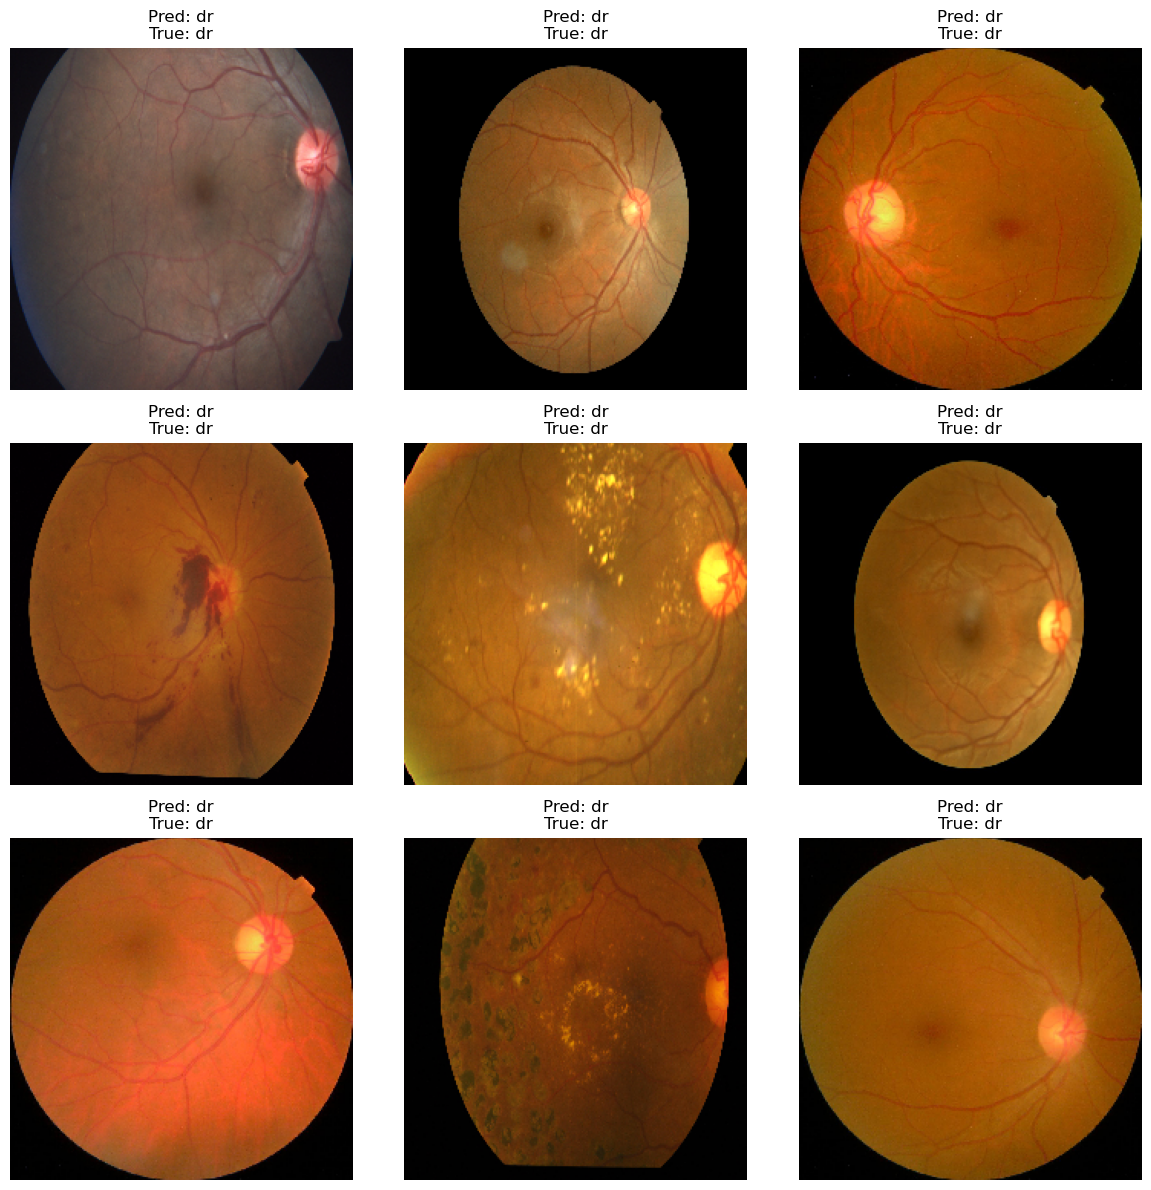

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_model.h5')

# Define class names in the same order as your training data
class_names = ['dr', 'glaucoma', 'normal']  # Change this if needed
img_size = (224, 224)  # Same size used during training

# Test function with label support
def test_on_folder(folder_path, csv_path="test_labels.csv"):
    # Load labels
    labels_df = pd.read_csv(csv_path)
    label_dict = dict(zip(labels_df["filename"], labels_df["label"]))

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

    correct = 0
    total = 0

    print("\n--- Predictions ---\n")

    for idx, file in enumerate(image_files):
        img_path = os.path.join(folder_path, file)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array, verbose=0)
        predicted_class = class_names[np.argmax(prediction)]
        true_label = label_dict.get(file, "Unknown")

        is_correct = predicted_class == true_label
        if is_correct:
            correct += 1
        total += 1

        print(f"{file} | Predicted: {predicted_class} | True: {true_label} | {'✅' if is_correct else '❌'}")

    print(f"\nAccuracy: {correct}/{total} = {correct/total:.2%}")

    # Optional: show first 9 images
    plt.figure(figsize=(12, 12))
    for idx, file in enumerate(image_files[:9]):
        img_path = os.path.join(folder_path, file)
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array, verbose=0)
        predicted_class = class_names[np.argmax(prediction)]
        true_label = label_dict.get(file, "Unknown")

        plt.subplot(3, 3, idx + 1)
        plt.imshow(img)
        plt.title(f"Pred: {predicted_class}\nTrue: {true_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
test_on_folder("test_images")
